In [1]:
import pandas as pd
import os
import json
import datetime
import matplotlib.pyplot as plt
import csv
import numpy as np
%matplotlib inline

In [2]:
def to_date(epoch):
    return datetime.datetime.fromtimestamp(epoch/1000).strftime("%Y-%m-%d")
# first convert from milliseconds to seconds, and then convert format from time stamp

In [3]:
# Read each line of data as csv file   
data = []
fileNum = 2
while fileNum < 115: 
    with open('data/logs-insights-results-' + str(fileNum) + '.csv') as f:
        for line in csv.DictReader(f, fieldnames=('timestamp', 'message')):
            data.append(line)
        fileNum += 1

In [4]:
# check dimension of data
len(data)

822226

In [5]:
# check type
tp = []
for i in range(len(data)):
    tp.append(data[i].get("type",None))
tp = pd.DataFrame({"type":tp})
print(tp["type"].value_counts())

Series([], Name: type, dtype: int64)


In [6]:
# check event
event = []
for i in range(len(data)):
    event.append(data[i].get("event",None))
event = pd.DataFrame({"event":event})
print(event["event"].value_counts())
print(event.isnull().sum()) # 9419 entries contain null event = number of profile_set_once.
print(data[0])

Series([], Name: event, dtype: int64)
event    822226
dtype: int64
{'timestamp': '@timestamp', 'message': '@message'}


In [7]:
data[0].keys()

dict_keys(['timestamp', 'message'])

## This decodes to message into different attributes:
#### account: the account of the user 
#### sourceIP: the ip address of the sender of the message
#### destIP: the receiver of the message
#### interface: the log stream of the message
#### srcPort: internet port of sender
#### dstPort: internet port of receiver
#### protocol: the network protocol used to communicate the message
#### byte: the size of the message
#### packets: number of segments of the message
#### timeStamp: exact time it took to send the message
#### status: either "ACCEPT" or "REJECT"

In [8]:
date = []
time = []
account = []
sourceIP = []
destIP = []
interface = []
srcPort = []
dstPort = []
protocol = []
byte = []
packets = []
timeStamp = []
status = []

na = None
i = 1

while i < len(data):
    msg = data[i].get('message',na)
    # for messages with no data will get filtered out here
    if 'ACCEPT' in msg or 'REJECT' in msg:
        timeTokens = data[i].get('timestamp',na).split()
        date.append(timeTokens[0])
        time.append(timeTokens[1])
        tokens = msg.split()
        account.append(tokens[1])
        interface.append(tokens[2])
        sourceIP.append(tokens[3])
        destIP.append(tokens[4])
        #storing actions
        temp = 5
        tempStr = ''
        while(tokens[temp+1] != "OK"):
            tempStr = tempStr + tokens[temp] + ' '
            temp += 1
        actionTokens = tempStr.split()
        srcPort.append(actionTokens[0])
        dstPort.append(actionTokens[1])
        protocol.append(actionTokens[2])
        packets.append(actionTokens[3])
        byte.append(actionTokens[4])
        timeStamp.append(int(actionTokens[6]) - int(actionTokens[5]))
        status.append(tokens[temp])
    i += 1
print(date[0])
print(time[0])
print(account[0])
print(interface[0])
print(sourceIP[0])
print(destIP[0])
print(status[0])
print(srcPort[0])
print(dstPort[0])
print(protocol[0])
print(packets[0])
print(byte[0])
print(timeStamp[0])
print(len(date))

2021-02-10
18:15:00.000
430405884063
eni-0b6ce86ea40aaa41b
50.245.225.205
172.16.1.52
ACCEPT
9622
80
6
5
582
9
813100


In [9]:
df = pd.DataFrame({
    "date":date,
    "time":time,
    "account":account,
    "interface":interface,
    "sourceIP":sourceIP,
    "destIP":destIP,
    "srcPort":srcPort,
    "dstPort":dstPort,
    "protocol":protocol,
    "packets":packets,
    "byte":byte,
    "timeStamp":timeStamp,
    "status":status
})

In [10]:
df.head(10)

,date,time,account,interface,sourceIP,destIP,srcPort,dstPort,protocol,packets,byte,timeStamp,status
0,2021-02-10,18:15:00.000,430405884063,eni-0b6ce86ea40aaa41b,50.245.225.205,172.16.1.52,9622,80,6,5,582,9,ACCEPT
1,2021-02-10,18:15:00.000,430405884063,eni-0b6ce86ea40aaa41b,172.16.1.52,50.245.225.205,80,9622,6,5,689,9,ACCEPT
2,2021-02-10,18:15:00.000,430405884063,eni-0b6ce86ea40aaa41b,50.245.225.205,172.16.1.52,22050,80,6,6,648,9,ACCEPT
3,2021-02-10,18:15:00.000,430405884063,eni-0b6ce86ea40aaa41b,172.16.1.52,50.245.225.205,80,22050,6,5,582,9,ACCEPT
4,2021-02-10,18:15:00.000,430405884063,eni-0b6ce86ea40aaa41b,50.245.225.205,172.16.1.52,51466,80,6,8,723,9,ACCEPT
5,2021-02-10,18:15:00.000,430405884063,eni-0b6ce86ea40aaa41b,172.16.1.52,50.245.225.205,80,51466,6,11,10996,9,ACCEPT
6,2021-02-10,18:15:00.000,430405884063,eni-0b6ce86ea40aaa41b,50.245.225.205,172.16.1.52,49748,80,6,7,705,9,ACCEPT
7,2021-02-10,18:15:00.000,430405884063,eni-0b6ce86ea40aaa41b,172.16.1.52,50.245.225.205,80,49748,6,13,12958,9,ACCEPT
8,2021-02-10,18:15:00.000,430405884063,eni-0b6ce86ea40aaa41b,50.245.225.205,172.16.1.52,18681,80,6,5,572,9,ACCEPT
9,2021-02-10,18:15:00.000,430405884063,eni-0b6ce86ea40aaa41b,172.16.1.52,50.245.225.205,80,18681,6,5,638,9,ACCEPT


In [11]:
df['packets'].describe()

count     813100
unique      1090
top            5
freq      656624
Name: packets, dtype: object

In [12]:
uniqueIP = set()
for i in sourceIP:
    uniqueIP.add(i)
for i in destIP:
    uniqueIP.add(i)
print("There are " + str(len(uniqueIP)) + " unique IP address.")

There are 1654 unique IP address.


In [13]:
df.sourceIP.value_counts()

172.16.1.52        358159
172.16.1.196       322741
73.180.143.70       26499
10.3.252.33         23185
50.245.225.205      11925
                    ...  
89.109.32.120           1
94.102.50.138           1
46.141.110.72           1
218.157.104.183         1
192.241.224.132         1
Name: sourceIP, Length: 1654, dtype: int64

<AxesSubplot:>

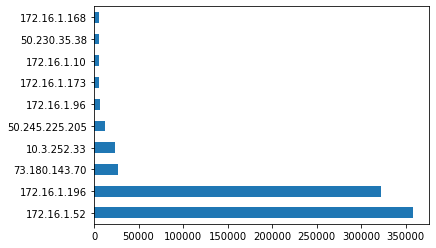

In [14]:
df.sourceIP.value_counts().head(10).plot.barh()

In [15]:
df.destIP.value_counts()

172.16.1.52       359118
172.16.1.196      334239
73.180.143.70      26493
50.245.225.205     11925
172.16.1.241        8379
                   ...  
209.141.47.230         1
209.17.97.98           1
125.21.227.187         1
52.247.201.54          1
138.68.161.204         1
Name: destIP, Length: 212, dtype: int64

<AxesSubplot:>

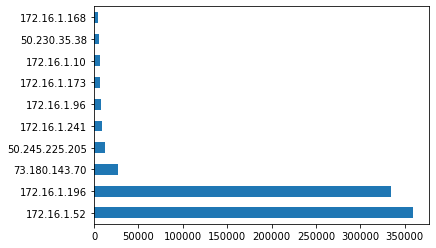

In [16]:
df.destIP.value_counts().head(10).plot.barh()

In [17]:
df.account.value_counts()

430405884063    809899
unknown           3201
Name: account, dtype: int64

In [18]:
df.status.value_counts()

ACCEPT    789081
REJECT     24019
Name: status, dtype: int64

In [19]:
df.time.value_counts()

19:35:28.000    4880
19:35:01.000    4374
19:32:00.000    4227
19:34:00.000    4146
19:33:01.000    4052
                ... 
20:22:32.000       1
21:32:54.000       1
19:21:07.000       1
19:26:47.000       1
20:54:57.000       1
Name: time, Length: 7915, dtype: int64

<AxesSubplot:>

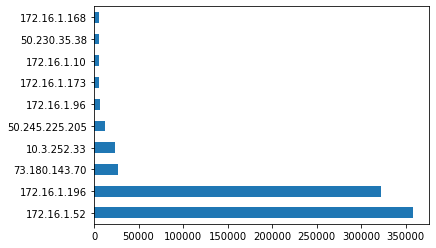

In [20]:
df.sourceIP.value_counts().head(10).plot.barh()

<AxesSubplot:>

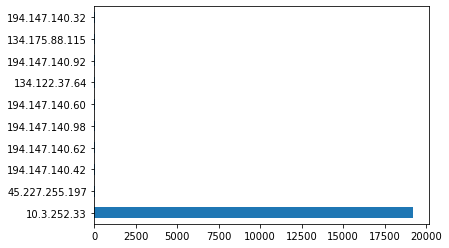

In [21]:
# check on the source ip address for the rejected 
df[df['status'].str.contains("REJECT")].sourceIP.value_counts().head(10).plot.barh()

<AxesSubplot:>

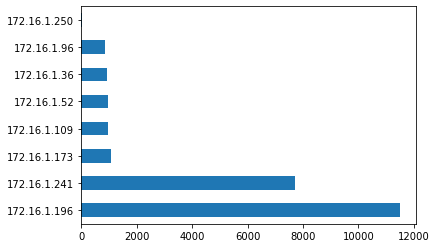

In [22]:
df[df['status'].str.contains("REJECT")].destIP.value_counts().head(10).plot.barh()

<AxesSubplot:>

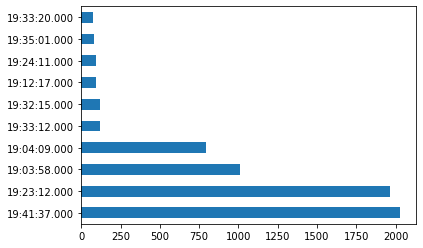

In [23]:
# what time are all the rejections come from
df[df['status'].str.contains("REJECT")].time.value_counts().head(10).plot.barh()

<AxesSubplot:>

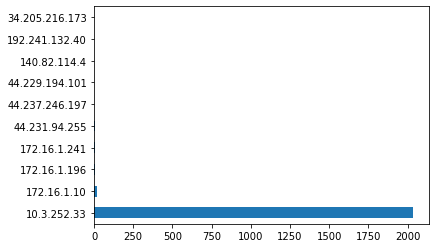

In [24]:
# why is this time has so many rejects? check for the ip address from this time
df[df['time'].str.contains("19:41:37.000")].sourceIP.value_counts().head(10).plot.barh()

<AxesSubplot:>

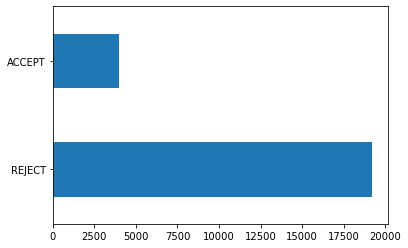

In [25]:
df[df['sourceIP'].str.contains("10.3.252.33")].status.value_counts().plot.barh()
#use lambda to calculate percentage of accept/reject

In [26]:
df['status'].describe()

count     813100
unique         2
top       ACCEPT
freq      789081
Name: status, dtype: object

In [27]:
# The IP address 10.3.252.33 seems suspicious as it sends 2000+ requests in 1 second, 
# and most of the rejections come to this address

<AxesSubplot:>

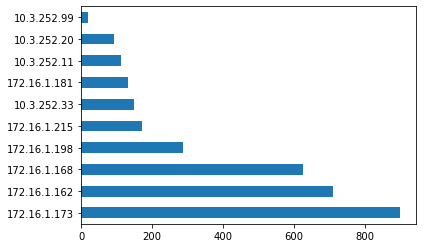

In [28]:
# check the source ip from the unknown account
df[df['account'].str.contains("unknown")].sourceIP.value_counts().head(10).plot.barh()

<AxesSubplot:>

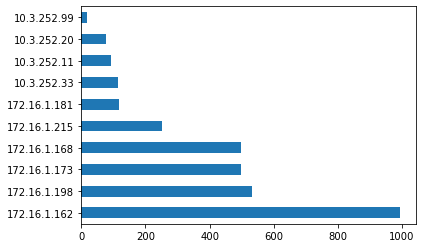

In [29]:
df[df['account'].str.contains("unknown")].destIP.value_counts().head(10).plot.barh()

<AxesSubplot:>

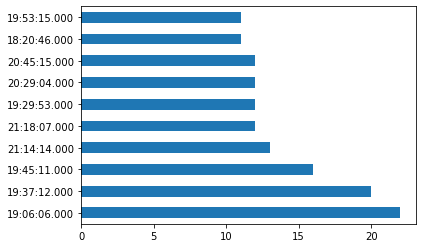

In [30]:
# what time are all the unknowns come from? Seems evenly out
df[df['account'].str.contains("unknown")].time.value_counts().head(10).plot.barh()

In [31]:
# all the unknown accounts are accepted
df[df['account'].str.contains("unknown")].status.value_counts()

ACCEPT    3201
Name: status, dtype: int64

In [32]:
# the unknowns seem to be the inside communication among the server's ip address

## Build Logistic Regression Model
#### Encode categorical columns to numeric values

In [33]:
df.columns

Index(['date', 'time', 'account', 'interface', 'sourceIP', 'destIP', 'srcPort',
       'dstPort', 'protocol', 'packets', 'byte', 'timeStamp', 'status'],
      dtype='object')

In [34]:
col_category = ['account','protocol','status']

In [35]:
df_dummies = pd.get_dummies(df[col_category], columns=col_category)

In [36]:
df_dummies.head()

,account_430405884063,account_unknown,protocol_1,protocol_132,protocol_17,protocol_41,protocol_6,status_ACCEPT,status_REJECT
0,1,0,0,0,0,0,1,1,0
1,1,0,0,0,0,0,1,1,0
2,1,0,0,0,0,0,1,1,0
3,1,0,0,0,0,0,1,1,0
4,1,0,0,0,0,0,1,1,0


In [37]:
df = df.join(df_dummies)

In [38]:
df.head()

,date,time,account,interface,sourceIP,destIP,srcPort,dstPort,protocol,packets,...,status,account_430405884063,account_unknown,protocol_1,protocol_132,protocol_17,protocol_41,protocol_6,status_ACCEPT,status_REJECT
0,2021-02-10,18:15:00.000,430405884063,eni-0b6ce86ea40aaa41b,50.245.225.205,172.16.1.52,9622,80,6,5,...,ACCEPT,1,0,0,0,0,0,1,1,0
1,2021-02-10,18:15:00.000,430405884063,eni-0b6ce86ea40aaa41b,172.16.1.52,50.245.225.205,80,9622,6,5,...,ACCEPT,1,0,0,0,0,0,1,1,0
2,2021-02-10,18:15:00.000,430405884063,eni-0b6ce86ea40aaa41b,50.245.225.205,172.16.1.52,22050,80,6,6,...,ACCEPT,1,0,0,0,0,0,1,1,0
3,2021-02-10,18:15:00.000,430405884063,eni-0b6ce86ea40aaa41b,172.16.1.52,50.245.225.205,80,22050,6,5,...,ACCEPT,1,0,0,0,0,0,1,1,0
4,2021-02-10,18:15:00.000,430405884063,eni-0b6ce86ea40aaa41b,50.245.225.205,172.16.1.52,51466,80,6,8,...,ACCEPT,1,0,0,0,0,0,1,1,0


In [39]:
df.columns

Index(['date', 'time', 'account', 'interface', 'sourceIP', 'destIP', 'srcPort',
       'dstPort', 'protocol', 'packets', 'byte', 'timeStamp', 'status',
       'account_430405884063', 'account_unknown', 'protocol_1', 'protocol_132',
       'protocol_17', 'protocol_41', 'protocol_6', 'status_ACCEPT',
       'status_REJECT'],
      dtype='object')

In [40]:
selected_features = [u'account_430405884063',u'account_unknown',
                     u'srcPort',u'dstPort',u'protocol_1',u'protocol_132',u'protocol_17',
                     u'protocol_41',u'protocol_6',u'byte',
                     u'timeStamp',u'status_ACCEPT',u'status_REJECT']
X = df[selected_features].values
y = df['timeStamp'].values

In [41]:
X.shape

(813100, 13)

#### Train-test split the data

In [42]:
# import train test splbit function from sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Logistic Regression model using sklearn

# I am stuck here

In [43]:
# Import logistic regression from sklearn
from sklearn.linear_model import LogisticRegression

# Initialize model by providing parameters
# http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
clf = LogisticRegression(C=1.0, penalty='l2')

# Fit a model by providing X and y from training set
clf.fit(X_train, y_train)

# Make prediction on the training data
y_train_pred = clf.predict(X_train)
p_train_pred = clf.predict_proba(X_train)[:,1]

# Make predictions on test data
y_test_pred = clf.predict(X_test)
p_test_pred = clf.predict_proba(X_test)[:,1]

/Users/alexshen/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Calculate the metric scores for the model

In [44]:
# Import metrics functions from sklearn
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, roc_auc_score

In [45]:
# Helper method to print metric scores    
def get_performance_metrics(y_train, y_train_pred, y_test, y_test_pred, threshold=0.5):
    metric_names = ['AUC','Accuracy','Precision','Recall','f1-score']
    metric_values_train = [roc_auc_score(y_train, y_train_pred),
                    accuracy_score(y_train, y_train_pred>threshold),
                    precision_score(y_train, y_train_pred>threshold),
                    recall_score(y_train, y_train_pred>threshold),
                    f1_score(y_train, y_train_pred>threshold)
                   ]
    metric_values_test = [roc_auc_score(y_test, y_test_pred),
                    accuracy_score(y_test, y_test_pred>threshold),
                    precision_score(y_test, y_test_pred>threshold),
                    recall_score(y_test, y_test_pred>threshold),
                    f1_score(y_test, y_test_pred>threshold)
                   ]
    all_metrics = pd.DataFrame({'metrics':metric_names,
                                'train':metric_values_train,
                                'test':metric_values_test},columns=['metrics','train','test']).set_index('metrics')
    print(all_metrics)

In [46]:
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(y_train, y_train_pred, y_test, y_test_pred, title):
    roc_auc_train = roc_auc_score(y_train, y_train_pred)
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)

    roc_auc_test = roc_auc_score(y_test, y_test_pred)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)
    plt.figure()
    lw = 2
    plt.plot(fpr_train, tpr_train, color='green',
             lw=lw, label='ROC Train (AUC = %0.4f)' % roc_auc_train)
    plt.plot(fpr_test, tpr_test, color='darkorange',
             lw=lw, label='ROC Test (AUC = %0.4f)' % roc_auc_test)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.savefig('ROC_' + title + '.png', bbox_inches="tight",dpi=500)
    plt.show()

In [47]:
# print model results
get_performance_metrics(y_train, p_train_pred, y_test, p_test_pred)
plot_roc_curve(y_train, p_train_pred, y_test, p_test_pred, 'LgReg')

ValueError: multi_class must be in ('ovo', 'ovr')

In [ ]:
df_coeffs = pd.DataFrame(list(zip(selected_features, clf.coef_.flatten()))).sort_values(by=[1], ascending=False)
df_coeffs.columns = ['feature', 'coeff']
df_coeffs

In [ ]:
from pylab import rcParams
#plt.barh(y_pos, performance, align='center', alpha=0.5)
ax = df_coeffs.plot.barh(align='center',width=0.35)
t = np.arange(X.shape[1])
ax.set_yticks(t)
ax.set_yticklabels(df_coeffs['feature'])
rcParams['figure.figsize'] = 12, 12
plt.savefig('features.png',bbox_inches="tight",dpi=500)
plt.tight_layout()
plt.show()

### model evaluation

#### confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve

In [ ]:
confusion_matrix(y_test, y_test_pred)

In [ ]:
# Helper method to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred):
    '''
    Code from sklearn example.
    '''
    cm = confusion_matrix(y_true, y_pred)
    print(cm)

    # Show confusion matrix in a separate window
    plt.matshow(cm)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [ ]:
plot_confusion_matrix(y_train, y_train_pred)

In [ ]:
plot_confusion_matrix(y_test, y_test_pred)

In [ ]:
print("Area Under Curve (AUC) of the Logistic Regression is: {}".format(roc_auc_score(y_test, y_test_pred)))